
## DATA SCIENCE INTERNSHIP LET'S GROW MORE

## ADVANCE  LEVEL TASK

## Task 3: Hand Written Equation Solver using CNN 

**Link for the dataset:** https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view



# Importing the necessary libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

import pickle

# Data Preprocessing

In [2]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data
                

In [3]:
data=[]
data=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//-//')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])


1008


In [4]:
data11=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//+//')
for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))


2008


In [5]:
data0=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//0//')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

3016


In [6]:
data1=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//1//')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

4358


In [7]:
data2=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//2//')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))



In [8]:
data3=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//3//')
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

6672


In [9]:
data4=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//4//')
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

7720


In [10]:
data5=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//5//')
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

8765


In [11]:
data6=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//6//')
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

9880


In [12]:
data7=load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//7//')
for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

10951


In [13]:
data8 = load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//8//')
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

12050


In [14]:
data9 = load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//9//')
for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

13108


In [15]:
data12 = load_images_from_folder('C://Users//Tharun//Desktop//LetsGrowMore__DS//Advanced Task-3//data//extracted_images//X//')
for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

14326


In [16]:
df=pd.DataFrame(data,index=None)
df.to_csv('train.csv',index=False)

# Model Building

In [17]:
data = pd.read_csv('train.csv',index_col=False)
labels = data[['784']]

In [18]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [20]:
labels=np.array(labels)

In [21]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [22]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [23]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.shape

(14326, 784)

In [25]:
temp=data.to_numpy()

In [26]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [27]:
temp.shape[0]

14326

In [28]:
X_train.shape

(14326, 28, 28, 1)

In [29]:
l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [30]:
np.random.seed(7)

In [31]:
len(l[0])

1

In [32]:
X_train.shape

(14326, 28, 28, 1)

### Building the model

In [33]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Summary of the model

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

### Plotting the Model

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Training the model

In [37]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [38]:
model.fit(X_train, cat, epochs=25, batch_size=200,shuffle=True,verbose=1)

Epoch 1/25
72/72 [==============================] - 4s 49ms/step - loss: 2.1630 - accuracy: 0.4872
Epoch 2/25
72/72 [==============================] - 3s 48ms/step - loss: 0.5542 - accuracy: 0.8291
Epoch 3/25
72/72 [==============================] - 3s 47ms/step - loss: 0.3118 - accuracy: 0.9044
Epoch 4/25
72/72 [==============================] - 4s 50ms/step - loss: 0.2199 - accuracy: 0.9332
Epoch 5/25
72/72 [==============================] - 3s 48ms/step - loss: 0.1658 - accuracy: 0.9502
Epoch 6/25
72/72 [==============================] - 3s 47ms/step - loss: 0.1314 - accuracy: 0.9592
Epoch 7/25
72/72 [==============================] - 3s 47ms/step - loss: 0.1039 - accuracy: 0.9661
Epoch 8/25
72/72 [==============================] - 3s 47ms/step - loss: 0.0864 - accuracy: 0.9745
Epoch 9/25
72/72 [==============================] - 3s 47ms/step - loss: 0.0755 - accuracy: 0.9768
Epoch 10/25
72/72 [==============================] - 3s 47ms/step - loss: 0.0621 - accuracy: 0.9801
Epoch 11/

### Saving the model

In [41]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-2

# Testing the model

In [42]:
import cv2
import numpy as np
img = cv2.imread('Test.png',cv2.IMREAD_GRAYSCALE)

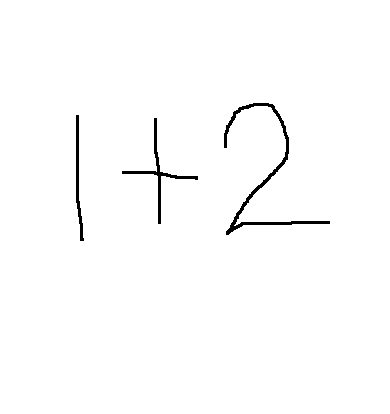

In [43]:
from IPython.display import Image
display(Image(filename='Test.png'))

In [44]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

3
[[76, 115, 8, 126], [122, 118, 76, 106], [224, 103, 106, 132]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
0
[[76, 115, 8, 126], [122, 118, 76, 106], [224, 103, 106, 132]]


In [45]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)

1/1 [==============================] - 0s 31ms/step
1+2


In [46]:
eval(equation)

3